In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [6]:
import h5py
import numpy as np

def loadDataset():
    trainDataset = h5py.File("C:\\Users\\rupan\\Downloads\\train_catvnoncat.h5", "r")
    testDataset = h5py.File("C:\\Users\\rupan\\Downloads\\test_catvnoncat.h5", "r")

    # Print the keys in the datasets to verify the correct ones
    print("Train dataset keys:", list(trainDataset.keys()))
    print("Test dataset keys:", list(testDataset.keys()))

    # Load datasets
    trainDatasetX = np.array(trainDataset["train_set_x"][:])
    trainDatasetY = np.array(trainDataset["train_set_y"][:])
    testDatasetX = np.array(testDataset["test_set_x"][:])
    testDatasetY = np.array(testDataset["test_set_y"][:])
    classes = np.array(trainDataset["list_classes"][:])

    # Print shapes before reshaping
    print("Train Dataset X shape:", trainDatasetX.shape)
    print("Train Dataset Y shape:", trainDatasetY.shape)

    # Reshape Y datasets
    trainDatasetY = trainDatasetY.reshape((1, trainDatasetY.shape[0]))
    testDatasetY = testDatasetY.reshape((1, testDatasetY.shape[0]))

    return trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes

trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes = loadDataset()
print("Train Dataset X shape:", trainDatasetX.shape)
print("Train Dataset Y shape:", trainDatasetY.shape)
print("Test Dataset X shape:", testDatasetX.shape)
print("Test Dataset Y shape:", testDatasetY.shape)



Train dataset keys: ['list_classes', 'train_set_x', 'train_set_y']
Test dataset keys: ['list_classes', 'test_set_x', 'test_set_y']
Train Dataset X shape: (209, 64, 64, 3)
Train Dataset Y shape: (209,)
Train Dataset X shape: (209, 64, 64, 3)
Train Dataset Y shape: (1, 209)
Test Dataset X shape: (50, 64, 64, 3)
Test Dataset Y shape: (1, 50)


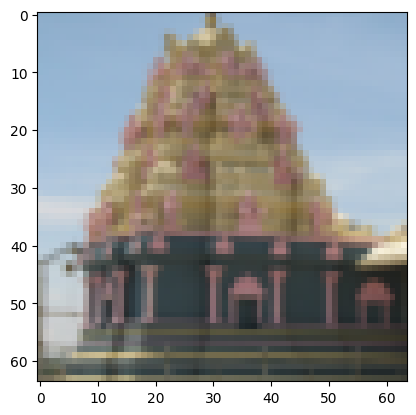

y = 0, it's a 'non-cat' picture.


In [7]:
index = 158
plt.imshow(trainDatasetX[index])
plt.show()
print ("y = " + str(trainDatasetY[0, index]) + ", it's a '" + classes[np.squeeze(trainDatasetY[:, index])].decode("utf-8") +  "' picture.")

In [8]:
m_train = trainDatasetX.shape[0]  # Number of training examples
m_test = testDatasetX.shape[0]    # Number of testing examples, if available
num_px = trainDatasetX.shape[1]   # Height (and width, assuming square images) of the images in pixels

# let's print some usefull imformation
print("Number of training examples: ", m_train)
print("Number of testing examples: ", m_test)
print("Height of image: ", num_px, "px")
print("Shape of image: ", trainDatasetX[0].shape)
print("Shape of training dataset X: ", trainDatasetX.shape)
print("Shape of training dataset Y: ", trainDatasetY.shape)

Number of training examples:  209
Number of testing examples:  50
Height of image:  64 px
Shape of image:  (64, 64, 3)
Shape of training dataset X:  (209, 64, 64, 3)
Shape of training dataset Y:  (1, 209)


In [9]:
XTrainFlatten = trainDatasetX.reshape(trainDatasetX.shape[0], -1).T
XTestFlatten = testDatasetX.reshape(testDatasetX.shape[0], -1).T

print("Shape of XFlatten: ", XTrainFlatten.shape)
print("Shape of XTestFlatten: ", XTestFlatten.shape)

XTrainFlatten = XTrainFlatten / 255
XTestFlatten = XTestFlatten / 255

Shape of XFlatten:  (12288, 209)
Shape of XTestFlatten:  (12288, 50)


In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def initializeParameters(dim):
    w = np.zeros((dim, 1))  # Initialize w with zeros or random values based on your requirement
    b = 0
    return w, b

In [14]:
def train_model(X, Y, numIterations, learningRate, printCost = False):
    nx = X.shape[0]
    m = X.shape[1]
    w, b = initializeParameters(nx)
    costs = []

    for i in range(numIterations):
        #forward propagation, cost calculation and backward propagation
        grad, cost = propagate(w, b, X, Y)
        costs.append(cost)
        #update weights
        w =w-learningRate*grad["dw"]
        b = b-learningRate*grad["db"]

        if(printCost and i%100==0):
            print(f"Cost after {i} iterations: {cost}")
    
    params = {"w": w,
              "b": b}
    
    return params, costs


In [15]:
params, costs = train_model(XTrainFlatten, trainDatasetY, numIterations = 2000, learningRate = 0.005, printCost = True)

Cost after 0 iterations: 0.6931471805599453
Cost after 100 iterations: 0.5845083636993086
Cost after 200 iterations: 0.46694904094655476
Cost after 300 iterations: 0.3760068669480209
Cost after 400 iterations: 0.33146328932825125
Cost after 500 iterations: 0.303273067474383
Cost after 600 iterations: 0.27987958658260487
Cost after 700 iterations: 0.2600421369258757
Cost after 800 iterations: 0.2429406846779662
Cost after 900 iterations: 0.2280042225672607
Cost after 1000 iterations: 0.21481951378449643
Cost after 1100 iterations: 0.20307819060644985
Cost after 1200 iterations: 0.19254427716706862
Cost after 1300 iterations: 0.18303333796883509
Cost after 1400 iterations: 0.17439859438448874
Cost after 1500 iterations: 0.1665213970540033
Cost after 1600 iterations: 0.15930451829756614
Cost after 1700 iterations: 0.15266732471296504
Cost after 1800 iterations: 0.14654223503982336
Cost after 1900 iterations: 0.1408720757031016


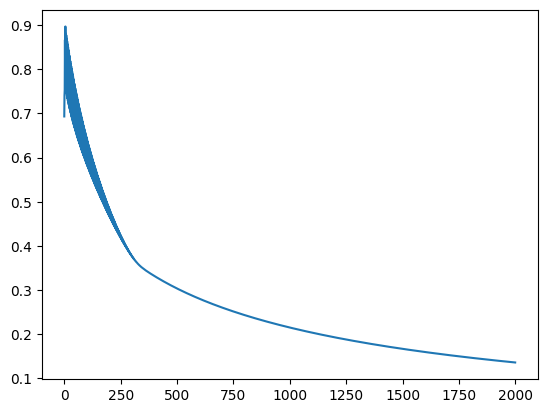

In [16]:
plt.plot(costs)
plt.show()

In [17]:
def predict(params, X, Y):
    w = params["w"]
    b = params["b"]
    Z = np.dot(w.T, X) + b  # Use np.dot for matrix multiplication
    A = sigmoid(Z)
    Y_Prediction = (A > 0.5) * 1.0
    return Y_Prediction

# Checking accuracy
trainPrediction = predict(params, XTrainFlatten, trainDatasetY)
testPrediction = predict(params, XTestFlatten, testDatasetY)

train_accuracy = 100 - np.mean(np.abs(trainPrediction - trainDatasetY)) * 100
test_accuracy = 100 - np.mean(np.abs(testPrediction - testDatasetY)) * 100

print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")

train accuracy: 99.04306220095694
test accuracy: 70.0
